In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber', 'CustomerId','Surname'], inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [15]:
X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [35]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [44]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8552 - loss: 0.3532 - val_accuracy: 0.8506 - val_loss: 0.3599
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8585 - loss: 0.3480 - val_accuracy: 0.8462 - val_loss: 0.3590
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8509 - loss: 0.3569 - val_accuracy: 0.8500 - val_loss: 0.3575
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8656 - loss: 0.3394 - val_accuracy: 0.8531 - val_loss: 0.3543
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8587 - loss: 0.3461 - val_accuracy: 0.8512 - val_loss: 0.3537
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8566 - loss: 0.3455 - val_accuracy: 0.8519 - val_loss: 0.3517
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8539 - loss: 0.3517 - val_accuracy: 0.8537 - val_loss: 0.3497
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8587 - loss: 0.3419 - val_accu

In [46]:
model.layers[0].get_weights()

[array([[-0.21701424, -0.25860012, -0.01093216,  0.24266799,  0.44017032,
         -0.18046343, -0.00896913,  0.18138184, -0.11592285,  0.14280929,
          0.03566142],
        [-0.5821067 ,  0.18515065,  0.4241065 , -0.35607073,  0.58832496,
          0.53818107,  0.19171537, -1.0207179 , -0.30663496, -0.9815465 ,
          0.5332554 ],
        [ 0.05662118, -0.1619311 ,  0.2640413 , -0.3053236 , -0.04118084,
          0.12475535, -0.07267205, -0.14648455,  0.09682917,  0.17354724,
         -0.00997332],
        [-0.00453287, -0.37660715, -0.37021178, -0.40719318,  0.08839999,
          0.3438341 ,  0.0931756 , -0.34682667, -1.0496771 ,  0.02396658,
          0.00203634],
        [ 0.8609426 ,  0.03287018, -0.5939531 , -0.95677936, -0.1327468 ,
         -0.11265624, -0.13521548, -0.0366154 , -0.32331148, -0.0523542 ,
          1.1446397 ],
        [-0.3970281 , -0.088429  , -0.0973311 , -0.04271586, -0.15319338,
          0.18453823, -0.09182632, -0.16821769, -0.07485936,  0.2166015

In [47]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [48]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8575

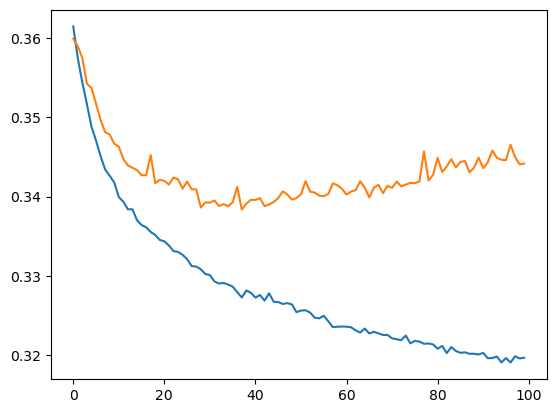

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

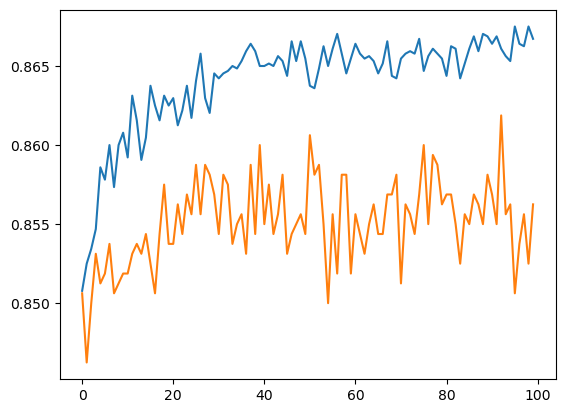

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])